In [1]:
# Install tmdbsimple (only need to run once)
!pip install tmdbsimple

In [2]:
import json
with open('/Users/James/OneDrive/Desktop/tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()

dict_keys(['client-id', 'api-key'])

In [3]:
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [4]:
## make a movie object using the .Movies function from tmdb
movie = tmdb.Movies(603)

In [5]:
## movie objects have a .info dictionary 
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/giBJ0ezYNEobFBfB8H4JNTjmll.jpg',
 'belongs_to_collection': {'id': 2344,
  'name': 'The Matrix Collection',
  'poster_path': '/bV9qTVHTVf0gkW0j7p7M0ILD4pG.jpg',
  'backdrop_path': '/bRm2DEgUiYciDw3myHuYFInD7la.jpg'},
 'budget': 63000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.warnerbros.com/matrix',
 'id': 603,
 'imdb_id': 'tt0133093',
 'original_language': 'en',
 'original_title': 'The Matrix',
 'overview': 'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 'popularity': 116.603,
 'poster_path': '/f89U3ADr1oiB1s9GkdPOEpXUk5H.jpg',
 'production_companies': [{'id': 79,
   'logo_path': '/at4uYdwAAgNRKhZuuFX8ShKSybw.png',
   'name': 'Village Roadshow Pictures',
   'origin_country': 'US'},
  {'id': 372,
   'logo_path': None,
   'name': 'Groucho II Film

In [6]:
def get_movie_with_rating(movie_id):
    movie = tmdb.Movies(movie_id)
    info = movie.info()
    releases = movie.releases()
    for c in releases['countries']:
        if c['iso_3166_1'] == 'US':
            info['certification'] = c['certification']
    return info

In [7]:
test = get_movie_with_rating("tt0848228")
test

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 153.756,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

In [8]:
import os, time, json
FOLDER = "Data/"
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'movies.png',
 'title-akas-us-only.csv',
 'title.basics.tsv.gz',
 'title.ratings.tsv.gz',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2002.json']

In [9]:
import pandas as pd
import glob
basics = pd.read_csv('Data/title.basics.tsv.gz', sep='\t', low_memory=False)

In [10]:
akas = pd.read_csv('Data/title-akas-us-only.csv', low_memory=False)

In [11]:
filter_us_titles = basics['tconst'].isin(akas['titleId'])
basics = basics[filter_us_titles]

In [12]:
# Convert 'nan' strings to NaN (missing values)
basics['startYear'] = pd.to_numeric(basics['startYear'], errors='coerce')

# Drop rows with NaN values in the 'startYear' column
basics = basics.dropna(subset=['startYear'])

# Now, you can filter the DataFrame as before
filtered_movies = basics[(basics['startYear'] >= 2000) & (basics['startYear'] <= 2022) & (basics['titleType'] == 'movie')]
basics.head(1)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short"


In [13]:
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/giBJ0ezYNEobFBfB8H4JNTjmll.jpg',
 'belongs_to_collection': {'id': 2344,
  'name': 'The Matrix Collection',
  'poster_path': '/bV9qTVHTVf0gkW0j7p7M0ILD4pG.jpg',
  'backdrop_path': '/bRm2DEgUiYciDw3myHuYFInD7la.jpg'},
 'budget': 63000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.warnerbros.com/matrix',
 'id': 603,
 'imdb_id': 'tt0133093',
 'original_language': 'en',
 'original_title': 'The Matrix',
 'overview': 'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 'popularity': 116.603,
 'poster_path': '/f89U3ADr1oiB1s9GkdPOEpXUk5H.jpg',
 'production_companies': [{'id': 79,
   'logo_path': '/at4uYdwAAgNRKhZuuFX8ShKSybw.png',
   'name': 'Village Roadshow Pictures',
   'origin_country': 'US'},
  {'id': 372,
   'logo_path': None,
   'name': 'Groucho II Film

In [14]:
movie = tmdb.Movies('tt1361336')
info = movie.info()
info['budget']

50000000

In [15]:
movie = tmdb.Movies('tt1361336')
# save the .info .releases dictionaries
info = movie.info()
releases = movie.releases()
# Loop through countries in releases
for c in releases['countries']:
    # if the country abbreviation==US
    if c['iso_3166_1' ] =='US':
        ## save a "certification" key in the info dict with the certification
       info['certification'] = c['certification']

In [16]:
releases = movie.releases()
for c in releases['countries']:
    if c['iso_3166_1'] == 'US':
        print(c['certification'])

PG
PG
PG


In [17]:
def write_json (new_data, filename): 
    with open(filename, 'r+') as file: 
        file_data = json.load(file)
        if (type (new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data) 
        else: 
            file_data.append(new_data) 
        file.seek(0) 
        json.dump(file_data, file)

In [18]:
# Define list of years to get from API for outer loop
YEARS_TO_GET = [2001,2002]

In [19]:
from tqdm.notebook import tqdm_notebook
for YEARS in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEARS}.json'
    FILE_EXISTS = os.path.isfile(JSON_FILE)
    
    
    if FILE_EXISTS == False:
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)
    df = basics.loc[basics['startYear']==YEARS].copy()
    movie_ids = df['tconst'].copy()
    previous_df = pd.read_json(JSON_FILE)
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]
    for movie_id in tqdm_notebook (movie_ids_to_get, 
                               desc=f'Movies from {YEARS}', 
                               position=1,
                               leave=True):
        
        try: 
            temp = get_movie_with_rating(movie_id)
            write_json(temp,JSON_FILE)
            time.sleep (0.02) 
        except Exception as e: 
            # errors.append([movie_id, e])
            print(e) 
            continue
            # Save the final results to a csv.gz file
    final_year_df = pd.read_json(JSON_FILE)

    csv_fname = f"{FOLDER}final_tmdb_data_{YEARS}.csv.gz"
    final_year_df.to_csv(csv_fname, compression="gzip", index=False)
        

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Movies from 2001:   0%|          | 0/10453 [00:00<?, ?it/s]

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0113545?api_key=60f72c688dc5486e89bb3c5f950316ab
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0119645?api_key=60f72c688dc5486e89bb3c5f950316ab
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0120605?api_key=60f72c688dc5486e89bb3c5f950316ab
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0121609?api_key=60f72c688dc5486e89bb3c5f950316ab
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0124278?api_key=60f72c688dc5486e89bb3c5f950316ab
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0128585?api_key=60f72c688dc5486e89bb3c5f950316ab
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0137775?api_key=60f72c688dc5486e89bb3c5f950316ab
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0138856?api_key=60f72c688dc5486e89bb3c5f950316ab
404 Client Error

KeyboardInterrupt: 

In [20]:
# Save the final results to a csv.gz file
final_year_df = pd.read_json(JSON_FILE)

csv_fname = f"{FOLDER}final_tmdb_data_{YEARS}.csv.gz"
final_year_df.to_csv(csv_fname, compression="gzip", index=False)

In [21]:
errors = [ ]

In [22]:
print(f"- Total errors: {len(errors)}")

- Total errors: 0


In [23]:
import glob
# Use glob to get all filepaths that match the pattern (*=wildcard)
files = sorted(glob.glob("Data/final_tmdb_data*.csv.gz"))
files

['Data\\final_tmdb_data_2001.csv.gz', 'Data\\final_tmdb_data_2002.csv.gz']

In [24]:
df_2000 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
df_2001 = pd.read_csv('Data/final_tmdb_data_2002.csv.gz')

In [25]:
df_2000.head(1)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Use read_csv in a list comprehension and combine with concat to load all files
df = pd.concat([pd.read_csv(f) for f in files] )
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0034413,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,1022890.0,en,Youth Gets a Break,...,0.0,20.0,[],Released,NaN,Youth Gets a Break,0.0,0.000,0.0,NaN
2,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.325,1243.0,PG-13
3,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
4,tt0116916,0.0,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,73549.0,en,The Dark Mist,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.0,3.500,2.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,tt0319514,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}, {'id': 18,...",NaN,26443.0,en,Horns and Halos,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Horns and Halos,0.0,6.200,7.0,NaN
3526,tt0376273,0.0,NaN,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",NaN,311749.0,en,Tropical Passions,...,0.0,0.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Tropical Passions,0.0,6.500,2.0,NaN
3527,tt0498230,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,1207432.0,en,Crossroads: 40 Days with Britney,...,0.0,25.0,[],Released,NaN,Crossroads: 40 Days with Britney,0.0,0.000,0.0,NaN
3528,tt21481418,0.0,NaN,NaN,0.0,[],NaN,1210079.0,en,Schwaz,...,0.0,0.0,[],Released,NaN,Schwaz,0.0,0.000,0.0,NaN


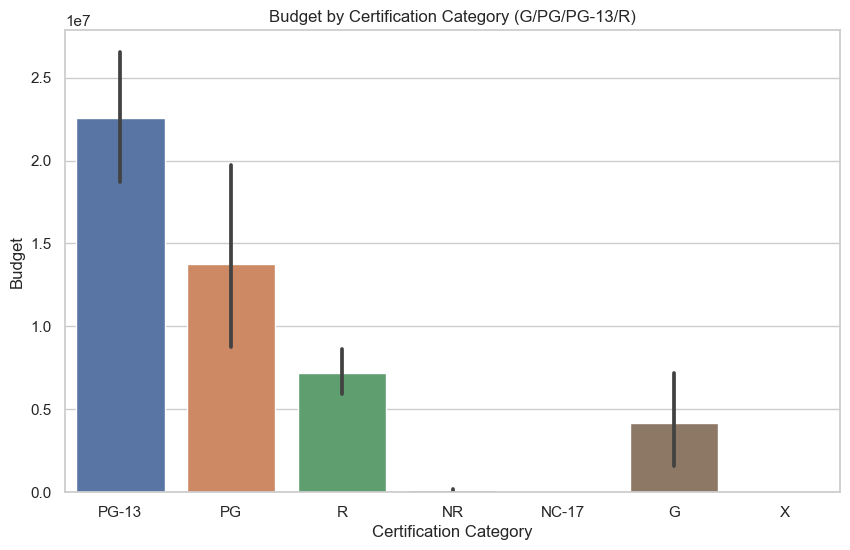

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="certification", y="budget", data=df)
ax.set(xlabel="Certification Category", ylabel="Budget")
plt.title("Budget by Certification Category (G/PG/PG-13/R)")
plt.show()

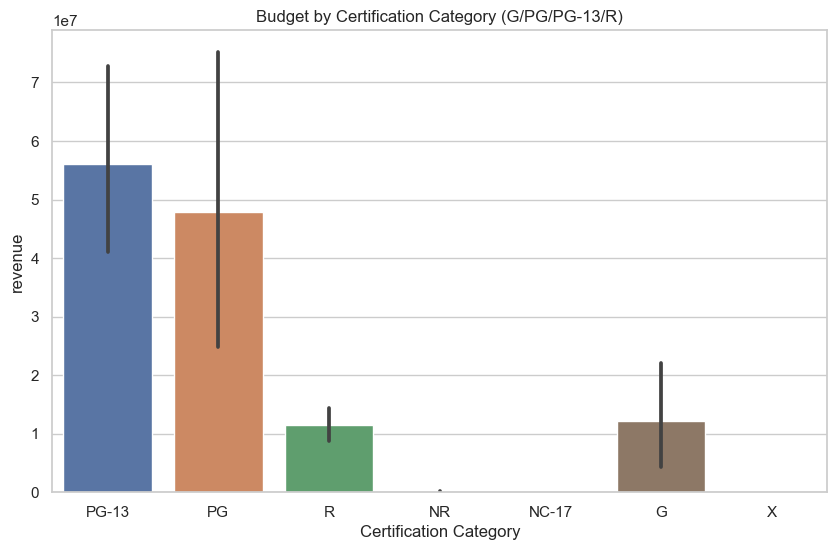

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="certification", y="revenue", data=df)
ax.set(xlabel="Certification Category", ylabel="revenue")
plt.title("Budget by Certification Category (G/PG/PG-13/R)")
plt.show()

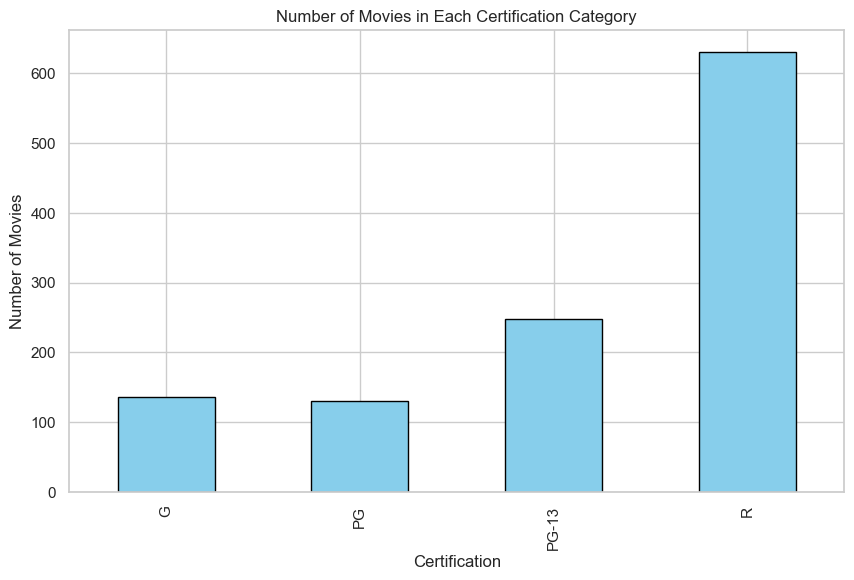

In [29]:
# Ensure the 'certification' column is present in the DataFrame
certification_counts = df['certification'].value_counts()
certification_counts = certification_counts.reindex(['G', 'PG', 'PG-13', 'R'])
plt.figure(figsize=(10, 6))
certification_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Certification')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Certification Category')
plt.show()